In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Surpressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading data from csv

df_heart = pd.read_csv('heart-disease.csv')
df_heart.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Checking missing values and data types
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# Data set description
df_heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
# Creating new interactive features based on existing features
df_heart['thalach_age_ratio']= df_heart['thalach']/df_heart['age']
df_heart['trestbps_age_ratio']= df_heart['trestbps']/df_heart['age']
df_heart['chol_age_ratio']= df_heart['chol']/df_heart['age']

df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,thalach_age_ratio,trestbps_age_ratio,chol_age_ratio
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,2.380952,2.301587,3.698413
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,5.054054,3.513514,6.756757
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,4.195122,3.170732,4.975610
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,3.178571,2.142857,4.214286
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,2.859649,2.105263,6.210526


In [7]:
# Determine the Categorical features based on the number of unique values

cat_features = [col for col in df_heart.columns if df_heart[col].nunique() <= 5]
num_features = [col for col in df_heart.columns if df_heart[col].nunique() > 5]

print('Categorical features:', cat_features)
print('Numerical Features:', num_features)

Categorical features: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
Numerical Features: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'thalach_age_ratio', 'trestbps_age_ratio', 'chol_age_ratio']


## Plotting Categorical and Numerical Features for better visualization

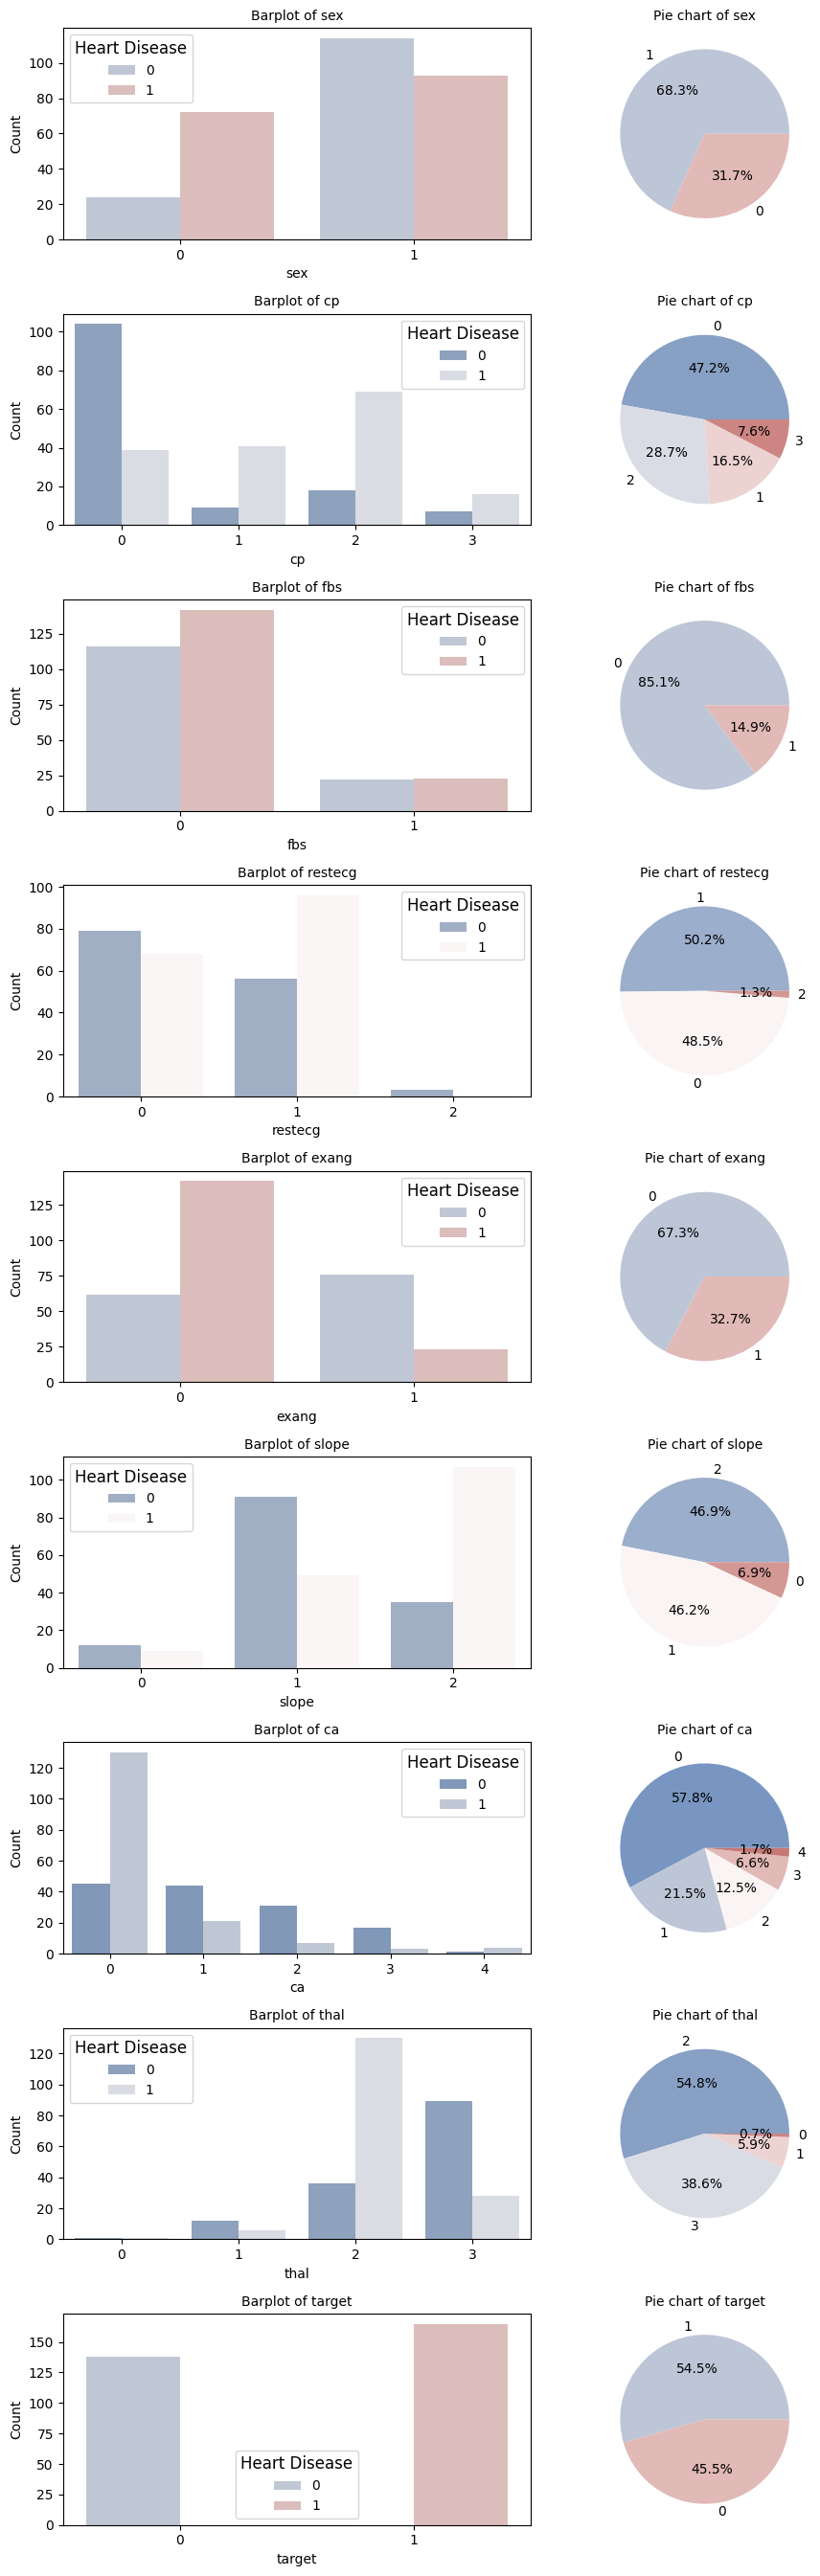

In [8]:
# Plotting Categorical Features

n_cat_features = len(cat_features)
countplot_palette = sns.color_palette('vlag', n_cat_features)
fig,axes = plt.subplots(n_cat_features, 2, figsize=(10, 3*n_cat_features))

for i, features in enumerate(cat_features):

    # Determine the number of unique values
    n_unique_values = df_heart[features].nunique()

    # Determine the palette based on the number of unique values
    palette = sns.color_palette('vlag',n_unique_values)

    #Barplot on the left
    sns.countplot(data=df_heart, x=features, palette=palette, ax=axes[i,0], hue='target')
    axes[i,0].set_title(f'Barplot of {features}', fontsize=10)
    axes[i,0].set_xlabel(features, fontsize=10)
    axes[i,0].set_ylabel('Count', fontsize=10)
    axes[i,0].legend(title='Heart Disease', title_fontsize=12)

    # Piechart on the right
    df_heart[features].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[i,1], colors=palette)
    axes[i,1].set_title(f'Pie chart of {features}', fontsize=10)
    axes[i,1].set_ylabel('')

plt.tight_layout()
plt.show()

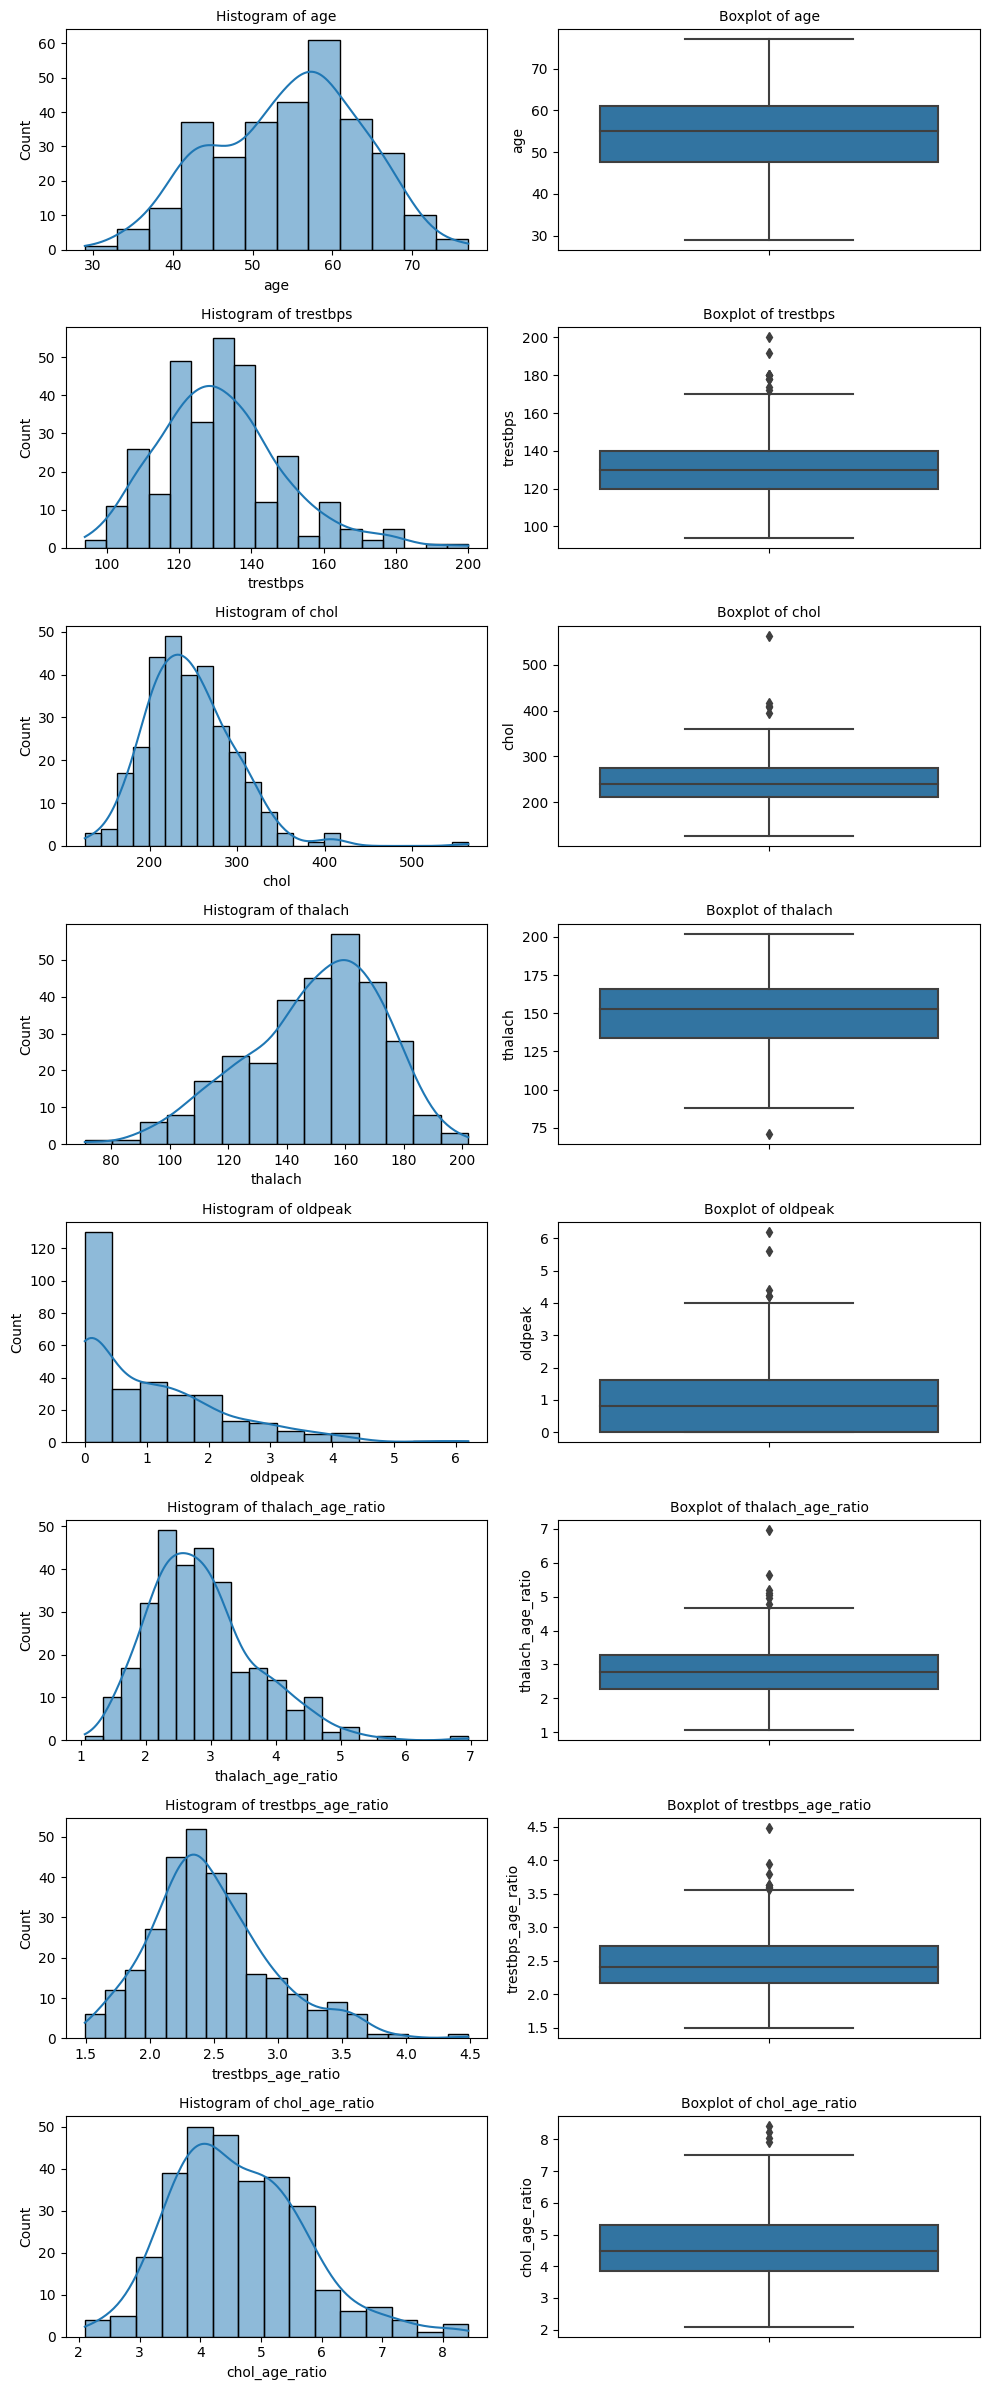

In [9]:
# Plotting Numerical Features

n_cat_features = len(num_features)
countplot_palette = sns.color_palette('vlag', n_cat_features)
fig,axes = plt.subplots(n_cat_features, 2, figsize=(10, 3*n_cat_features))


for i, features in enumerate(num_features):
    # Determine the number of unique values
    n_unique_values = df_heart[features].nunique()

    # Determine the palette based on the number of unique values
    palette = sns.color_palette('vlag',n_unique_values)

    # Histogram on the left
    sns.histplot(data=df_heart, kde=True, x=features, palette=palette, ax=axes[i,0])
    axes[i,0].set_title(f'Histogram of {features}', fontsize=10)
    axes[i,0].set_xlabel(features, fontsize=10)
    axes[i,0].set_ylabel('Count', fontsize=10)

    # Boxplot on the right
    sns.boxplot(y=df_heart[features], ax=axes[i,1])
    axes[i,1].set_title(f'Boxplot of {features}', fontsize=10)
    axes[i,1].set_ylabel(features)

# Adjust the layout
plt.tight_layout()
plt.show()

## Identifying Outliers
determined to keep outliers

In [10]:
# Function to detect outliers for numerical features

from sklearn.ensemble import IsolationForest

def detect_outliers_isolation_forest(df, feature):
    iso_forest = IsolationForest(contamination=0.01)
    preds = iso_forest.fit_predict(df[[feature]])
    outliers = df[preds == -1]
    return outliers

for feature in num_features:
    outliers = detect_outliers_isolation_forest(df_heart, feature)
    print(f"Outliers in {feature}:")
    print(outliers)


Outliers in age:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
72    29    1   1       130   204    0        0      202      0      0.0   
129   74    0   1       120   269    0        0      121      1      0.2   
144   76    0   2       140   197    0        2      116      0      1.1   
238   77    1   0       125   304    0        0      162      1      0.0   

     slope  ca  thal  target  thalach_age_ratio  trestbps_age_ratio  \
72       2   0     2       1           6.965517            4.482759   
129      2   1     2       1           1.635135            1.621622   
144      1   0     2       1           1.526316            1.842105   
238      2   3     2       0           2.103896            1.623377   

     chol_age_ratio  
72         7.034483  
129        3.635135  
144        2.592105  
238        3.948052  
Outliers in trestbps:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
71    51    1   2        94   227    0

## Features and Targets

In [11]:
# Spliting Features and Target

X = df_heart.drop(columns='target')
y = df_heart['target']

In [12]:
# Creating Correlation Matrix

corr_matrix = df_heart.corr()
filterd_corr_matrix = corr_matrix[(corr_matrix > 0.1) | (corr_matrix < -0.1)]

# Get key features for target result (|corr| > 0.1 |corr| < -0.1)
corr_with_target = corr_matrix['target'].reset_index().sort_values(by='target', ascending=False)
corr_with_target.columns=['Features', 'Correlation']
filtered_corr_with_target = corr_with_target[(corr_with_target['Correlation'] > 0.03) | (corr_with_target['Correlation'] < -0.03)]
filtered_corr_with_target = filtered_corr_with_target[filtered_corr_with_target['Features'] != 'target']

filtered_corr_with_target

,Features,Correlation
2,cp,0.433798
7,thalach,0.421741
14,thalach_age_ratio,0.382753
10,slope,0.345877
6,restecg,0.137230
15,trestbps_age_ratio,0.125003
16,chol_age_ratio,0.091767
4,chol,-0.085239
3,trestbps,-0.144931
0,age,-0.225439


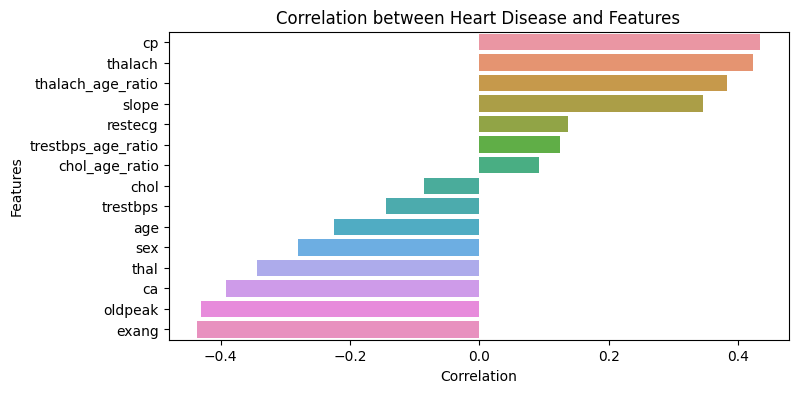

In [13]:
# Plotting Correlation Matrix

plt.figure(figsize=(8, 4))
sns.barplot(x='Correlation', y='Features', data=filtered_corr_with_target)
plt.title('Correlation between Heart Disease and Features')
plt.show()

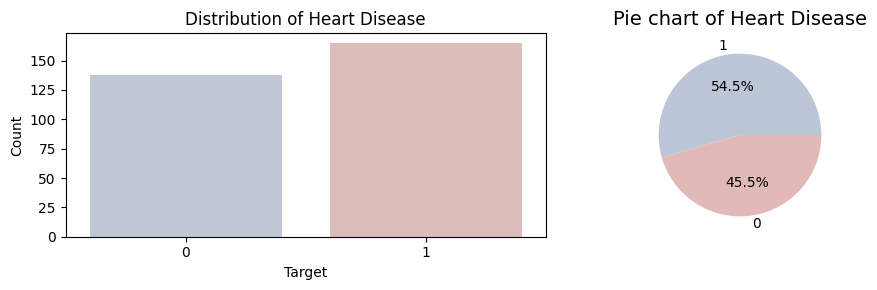

In [14]:
# Ploting the distribution of the target

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
palette = sns.color_palette('vlag',2)

sns.countplot(data=df_heart, x='target', palette=palette, ax=axes[0])
axes[0].set_title('Distribution of Heart Disease')
axes[0].set_xlabel('Target')
axes[0].set_ylabel('Count')

df_heart['target'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[1], colors=palette)
axes[1].set_title('Pie chart of Heart Disease', fontsize=14)
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

## Target Values are balanced. 
Keeping outlier , Scaler considerd Robust Scaler and transformer Quantile Transformer


## Creating Pipelie to Scale and Normalize data

In [15]:
# Importing Libraries

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import numpy as np

In [16]:
# Grid Search Parameters

# Categorical and Numerical Features
cat_features= ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
num_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'thalach_age_ratio', 'trestbps_age_ratio', 'chol_age_ratio']

# Categorical transformer
cat_transformer = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# numerical transformer
num_transformer = {
    'standard': Pipeline([
        ('scaler', StandardScaler())
    ]),
    'minmax': Pipeline([
        ('scaler', MinMaxScaler())
    ]),
    'robust': Pipeline([
        ('scaler', RobustScaler())
    ])
}

# Combine Categorical and Numerical transformers
preprocessor = ColumnTransformer([
    ('cat', cat_transformer, cat_features),
    ('num', 'passthrough', num_features)
])

# Define pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Classification Models
classification_models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')  # XGBoost settings to avoid warnings
}

# Define the parameters for grid search
param_grid = [
    {
        'preprocessor__num': list(num_transformer.values()),
        'classifier': [LogisticRegression(max_iter=1000)],
        'classifier__C': [0.01, 0.1, 1, 10, 100],
        'classifier__solver': ['liblinear', 'saga']
    },
    {
        'preprocessor__num': list(num_transformer.values()),
        'classifier': [KNeighborsClassifier()],
        'classifier__n_neighbors': [3, 5, 7, 9]
    },
    {
        'preprocessor__num': list(num_transformer.values()),
        'classifier': [SVC()],
        'classifier__C': [0.01, 0.1, 1, 10, 100],
        'classifier__kernel': ['linear', 'rbf']
    },
    {
        'preprocessor__num': list(num_transformer.values()),
        'classifier': [DecisionTreeClassifier()],
        'classifier__max_depth': [3, 5, 10]
    },
    {
        'preprocessor__num': list(num_transformer.values()),
        'classifier': [RandomForestClassifier()],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [3, 5, 10]
    },
    {
        'preprocessor__num': list(num_transformer.values()),
        'classifier': [GradientBoostingClassifier()],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.01, 0.1, 1]
    },
    {
        'preprocessor__num': list(num_transformer.values()),
        'classifier': [AdaBoostClassifier()],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.01, 0.1, 1]
    },
    {
        'preprocessor__num': list(num_transformer.values()),
        'classifier': [GaussianNB()]
    },
    {
        'preprocessor__num': list(num_transformer.values()),
        'classifier': [XGBClassifier(use_label_encoder=False, eval_metric='logloss')],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.01, 0.1, 1],
        'classifier__max_depth': [3, 5, 10]
    }
]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Set up the GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print(f"Test Set Score: {test_score}")


Fitting 5 folds for each of 246 candidates, totalling 1230 fits


/home/karush/.pyenv/versions/3.10.6/envs/heart-dis/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/karush/.pyenv/versions/3.10.6/envs/heart-dis/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/karush/.pyenv/versions/3.10.6/envs/heart-dis/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/karush/.pyenv/versions/3.10.6/envs/heart-dis/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/karush/.pyenv/versions/3.10.6/envs/heart-dis/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The ma

Best Parameters: {'classifier': KNeighborsClassifier(), 'classifier__n_neighbors': 5, 'preprocessor__num': Pipeline(steps=[('scaler', MinMaxScaler())])}
Best Cross-Validation Score: 0.8683673469387756
Test Set Score: 0.819672131147541


In [17]:
# Feature importance
from sklearn.inspection import permutation_importance

# Compute permutation importance
result = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Display results
for i in result.importances_mean.argsort()[::-1]:
    if result.importances_mean[i] - 2 * result.importances_std[i] > 0:
        print(f"{X.columns[i]}: {result.importances_mean[i]:.3f} ± {result.importances_std[i]:.3f}")


thal: 0.080 ± 0.031


In [18]:
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exang', 'slope',
                                                   'ca', 'thal']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalach', 'oldpeak',
                                                   'thalach_age_ratio',
                                                   'trestbps_age_ratio',
                                                   'chol_age_ratio'])])),
                ('classifier', KNeighborsClassifier())])